In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import datasets

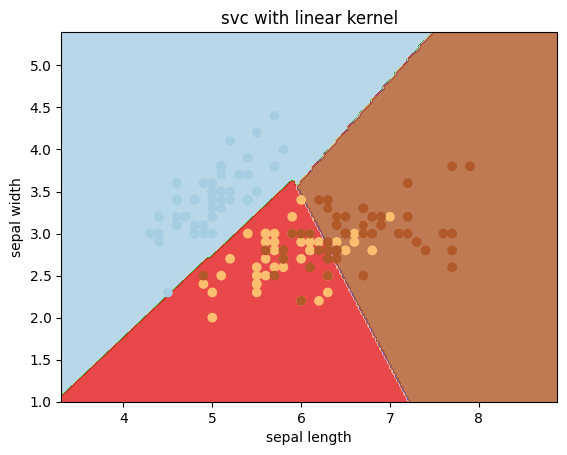

In [ ]:
# Linear.

iris=datasets.load_iris()
x=iris.data[:,:2]
y=iris.target
C=1.0
#svc=svm.SVC(kernel='linear',c,gamma=0).fit(x,y)
svc=svm.SVC(kernel='linear',C=1,gamma=0).fit(x,y)
x_min=x[:,0].min()-1
x_max=x[:,0].max()+1
y_min=x[:,1].min()-1
y_max=x[:,1].max()+1
h=(x_max/x_min)/100
xx,yy=np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
plt.subplot(1,1,1)
z = svc.predict(np.c_[xx.ravel(), yy.ravel()]) # flat contageous arrays are printed. all array values will be in same format.
z=z.reshape(xx.shape)
plt.contourf(xx,yy,z,cmap=plt.cm.Paired,alpha=0.8)
plt.scatter(x[:,0],x[:,1],c=y,cmap=plt.cm.Paired)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.xlim(xx.min(),xx.max())
plt.title('svc with linear kernel')
plt.show()

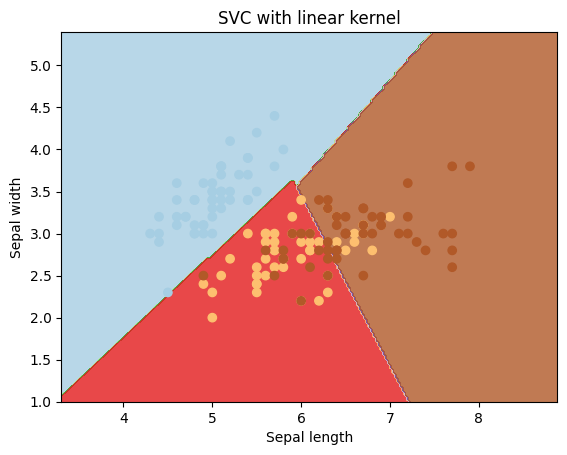

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

C = 1.0 # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=1,gamma=0).fit(X, y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
 np.arange(y_min, y_max, h))

plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')
plt.show()

In [ ]:
# Non-linear.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import datasets

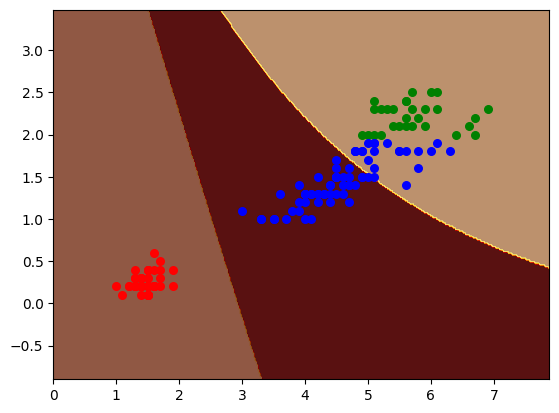

In [ ]:
#iris=datasets.load_iris
#x=iris.data[:,:-1]
#y=iris.data[:2,:4]
def make_meshgrid(x,y,h=0.02):
  x_min,x_max=x.min()-1,x.max()+1
  y_min,y_max=y.min()-1,y.max()+1
  xx,yy=np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
  return xx,yy
def plot_contours(ax,clf,xx,yy,**params):
  z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
  z=z.reshape(xx.shape)
  out=ax.contourf(xx,yy,z,**params)
  return out
color=['r','b','g','k']
iris=pd.read_csv('iris.data.txt').values
features=iris[0:150,2:4]
level_one=np.zeros(150)
level_two=np.zeros(150)
level_three=np.zeros(150)
for i in range(150):
  if i>=0 and i<50:
    level_one[i]=1
  elif i>=50 and i<100:
    level_two[i]=1
  elif i>=100 and i<150:
    level_three[i]=1
svm1=SVC(kernel='poly')
svm2=SVC(kernel='poly')
svm3=SVC(kernel='poly')
svm1.fit(features,level_one)
svm2.fit(features,level_two)
svm3.fit(features,level_three)
fig,ax=plt.subplots()
x0,x1=iris[:,2],iris[:,3]
xx,yy=make_meshgrid(x0,x1)
plot_contours(ax,svm1,xx,yy,cmap=plt.get_cmap('hot'),alpha=0.8)
plot_contours(ax,svm2,xx,yy,cmap=plt.get_cmap('hot'),alpha=0.3)
plot_contours(ax,svm3,xx,yy,cmap=plt.get_cmap('hot'),alpha=0.5)
for i in range(len(iris)):
  plt.scatter(iris[i][2],iris[i][3],s=30,c=color[int(iris[i][3])])
plt.show()